In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
pd.set_option('display.max_colwidth', -1)


import pandas as pd
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from nltk.tokenize import word_tokenize
from sklearn.utils import shuffle
from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import SGDClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
from tensorflow.python.keras.utils.vis_utils import plot_model
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

import torch
import re
import tqdm
from matplotlib._path import (affine_transform, count_bboxes_overlapping_bbox,
     update_path_extents)
from gensim.models import Word2Vec

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned data-2.csv to cleaned data-2.csv


In [ ]:
dataset=pd.read_csv('cleaned data-2.csv')
dataset.dropna(inplace = True)
dataset

,Id,Text,Class,Filtered_sentence
0,0,දින ඒකාබද්ධ විපක්ෂයේ මාධ්‍ය ලේකම් රේණුක පෙරේරා මහතාගේ නිවේදනයට අදාාලව අමිත් වීරසිංහ කල මාධ්‍ය සාකච්ඡාව…,Political,දින එකාබද්ධ විපක්ෂ මාධ්‍ ලේක රේනුක පෙරේර මහත නිවේදනය අදාාල අමි වීරසිංහ කල මාධ්‍ සාකච්චාව…
1,1,මා UNP හෝ ඒකාබද්ධ විපක්ෂය මගින් හෝ දැනට පවතින කිසිම පක්ෂයකින් ඡන්දයකට ඉදිරිපත් වෙනවා කියා නැ ඒකාබද්ධ විපක්ෂය වැනි වි…,Political,මා එක්සත් ජාතික පක්ෂ එකාබද්ධ විපක්ෂ පවති කිසි පක්ෂ චන්දයක ඉදිරිප වෙ කි නැ එකාබද්ධ විපක්ෂ වි…
2,2,කිමද මේ තරම් කොහේදෝ ඇති විදපු ගලක් හා උරන මා මිතුරු පරය,Neutral,කිම තර කොහේද විද ගල උරන මා මිතුර පරය
3,3,එහෙම කොහොමද උනේ 😂😂 පරය අපිව අයින් කරල නේ 😂,Neutral,එහෙ කොහොම උනේ 😂😂 පරය අපි අය කරල නේ 😂
4,4,විමලයා ගොනෙක් වගෙ stage එකෙ මෑරෙන්න හදනවා පරය රටට වෑඩක් කරපන් යකො හොරා,Political,විමල ගොන වගෙ එකෙ මෑරෙ හද පරය රටට වෑඩ කර යකො හොර
...,...,...,...,...
1674,1705,පීටීඒ සහ අයිසීසීපීආර් පනත යටතේ වැරදි ලෙස ගොනු කර ඇති විමර්ශන හෝ නඩු ප්‍රමාද වීම පිළිබඳව ඔබ සතුටු නොවන්නේ නම් කරුණාකර මුහීඩ් ජීරාන් මානව හිමිකම් ක්‍රියාකාරික වෙත දන්වන්න,Racist,පීටීඑ අයිසීසීපීඅර පනත යටත වැරදි ගො කර විමර්ෂ නඩු ප්‍රමා වීම ඔබ සතුට නොව කරුනාකර මුහීඩ ජීරා මාන හිමික ක්‍රියාකාරික දන්ව
1675,1706,අරාබි රටවල් මුස්ලිම් නොවන සඳහා සුපිරි වෙළඳසැල් වල තිබුණු ඌරු මස් අවසර ඇත මනුෂ්‍යත්වයට ගරු කරන්න,Racist,අරාබි රට මුස්ලි නොව සුපිරි වෙලදසැල වල තිබ උරු මස් අවසර ඇත මනුෂ්‍යත්වය ගරු කර
1676,1707,හැවිරිදි මුස්ලිම් පිරිමි ළමයෙක් ඉස්ලාම් භීතිකාවේ ඉලක්කය බවට පත්වූ අතර ගෝලීය විවෘත රජයේ සමුළු අවස්ථාව සඳහා ඔහුගේ නියෝජනය විනාශ විය,Racist,හැවිරිදි මුස්ලි පිරි ලමය ඉස්ලා බීතික ඉලක්ක පත්ව ගෝල විවෘත රජ සමුල අවස්ථා ඔහු නියෝජන විනාෂ විය
1677,1708,ශ්‍රී ලංකාවේ මුස්ලිම් ප්‍රජාව වෙත එල්ල කරන දේශපාලන හා ආගමික පීඩනය සම්බන්ධයෙන් යුරෝපා සංගමයේ ඒකාබද්ධ ප්‍රකාශය,Racist,ලංක මුස්ලි ප්‍රජා එල් කරන දේෂපාල අගමික පීඩන සම්බන්ධ යුරෝප සංගම එකාබද්ධ ප්‍රකාෂ


In [ ]:
class_to_num = {"Class": {'Religion': 5,
                'Racist': 4,
                'Political': 3,
                'sports':2,
                'Sexism': 1,
                'Neutral': 0
                }}

dataset = dataset.replace(class_to_num)

In [ ]:
print("number of tweets belonging to classes 0,1,2,3,4, and 5")
dataset.groupby('Class')['Id'].nunique()

number of tweets belonging to classes 0,1,2,3,4, and 5


Class
0    943
1    146
2    146
3    148
4    146
5    149
Name: Id, dtype: int64

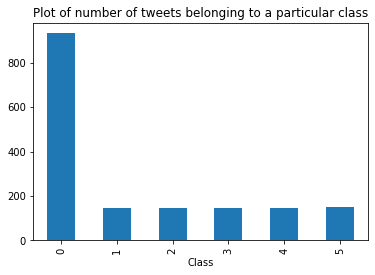

In [ ]:
dataset.groupby('Class')['Text'].nunique().plot(kind='bar',title='Plot of number of tweets belonging to a particular class')


Word2Vec model to get the word embedings

In [ ]:
model = Word2Vec(dataset["Filtered_sentence"].values, size=50, window=5, min_count=1, workers=4)

In [ ]:
def get_features(tweet):
    features=[]
    for word in tweet:
        features.append(model.wv[word])
    return np.mean(features,0)

In [ ]:
dataset["features"]=dataset["Filtered_sentence"].apply(get_features)

In [ ]:
data=[]
for i in dataset["features"].values:
    temp=[]
    for j in i:
        temp.append(j)
    data.append(temp)
data=np.array(data)

In [ ]:
from sklearn.preprocessing import label_binarize

Y = label_binarize(dataset["Class"].values, classes=[0, 1, 2, 3, 4, 5])
n_classes = Y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state=42)

In [ ]:
print(X_train)
print(y_train)

[[-0.48038784  0.00603433  0.07503639 ...  0.5618351  -0.04633687
   0.29580027]
 [-0.45782697  0.02173215  0.13203649 ...  0.6336125  -0.03365313
   0.30353114]
 [-0.4495161   0.0431888   0.15639696 ...  0.65891653 -0.0252911
   0.3071924 ]
 ...
 [-0.4866788   0.0334675   0.12906308 ...  0.597431   -0.03538546
   0.3244484 ]
 [-0.45314974  0.02265581  0.13145736 ...  0.6290299  -0.03559886
   0.30098012]
 [-0.44710338  0.03000933  0.16143365 ...  0.6611732  -0.02890483
   0.30125555]]
[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 1 0]
 ...
 [1 0 0 0 0 0]
 [0 0 0 0 0 1]
 [1 0 0 0 0 0]]


LOGISTIC REGRESSION MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

F1 Score:  0.5530434782608696
Precision Score:  0.6652719665271967
Recall Score:  0.4732142857142857
Accuracy:  0.4732142857142857


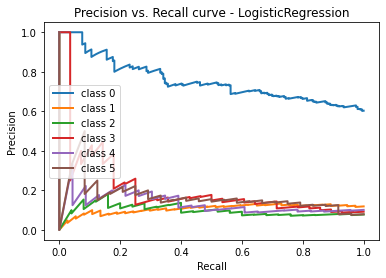

In [ ]:
lr_clf = OneVsRestClassifier(LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial'))
lr_clf.fit(X_train,y_train)
y_pred = lr_clf.predict(X_test)
f = f1_score(y_test, y_pred, average='micro')
print("F1 Score: ", f)
p = precision_score(y_test, y_pred, average='micro')
print("Precision Score: ", p)
r = recall_score(y_test, y_pred, average='micro')
print("Recall Score: ", r)
print("Accuracy: ", lr_clf.score(X_test,y_test))

y_score = lr_clf.predict_proba(X_test)
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc = "best")
plt.title("Precision vs. Recall curve - LogisticRegression")
plt.show()

SVM MODEL

F1 Score:  0.5606837606837607
Precision Score:  0.6586345381526104
Recall Score:  0.4880952380952381
Accuracy:  0.4880952380952381


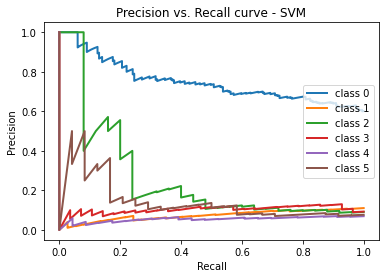

In [ ]:
svm_clf = OneVsRestClassifier(svm.SVC(gamma='scale', probability=True))
svm_clf.fit(X_train,y_train)
y_pred = svm_clf.predict(X_test)
f = f1_score(y_test, y_pred, average='micro')
print("F1 Score: ", f)
p = precision_score(y_test, y_pred, average='micro')
print("Precision Score: ", p)
r = recall_score(y_test, y_pred, average='micro')
print("Recall Score: ", r)
print("Accuracy: ", svm_clf.score(X_test,y_test))

y_score = svm_clf.predict_proba(X_test)
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc = "center right")
plt.title("Precision vs. Recall curve - SVM")
plt.show()

Random Forest

In [ ]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers


F1 Score:  0.5683836589698046
Precision Score:  0.7048458149779736
Recall Score:  0.47619047619047616
Accuracy:  0.47619047619047616


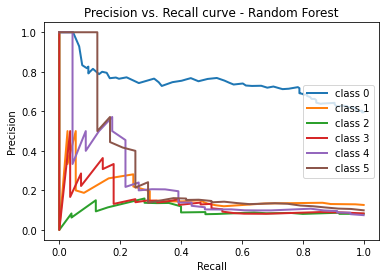

In [ ]:
RF_clf = OneVsRestClassifier(ensemble.RandomForestClassifier())
RF_clf.fit(X_train,y_train)
y_pred = RF_clf.predict(X_test)
f = f1_score(y_test, y_pred, average='micro')
print("F1 Score: ", f)
p = precision_score(y_test, y_pred, average='micro')
print("Precision Score: ", p)
r = recall_score(y_test, y_pred, average='micro')
print("Recall Score: ", r)
print("Accuracy: ", RF_clf.score(X_test,y_test))

y_score = RF_clf.predict_proba(X_test)
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc = "center right")
plt.title("Precision vs. Recall curve - Random Forest")
plt.show()

KNN

F1 Score:  0.552584670231729
Precision Score:  0.6888888888888889
Recall Score:  0.46130952380952384
Accuracy:  0.46130952380952384


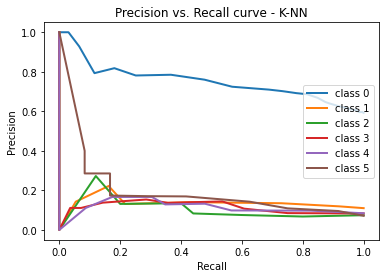

In [ ]:
KNN_clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=25, p=6,metric='euclidean'))
KNN_clf.fit(X_train,y_train)
y_pred = KNN_clf.predict(X_test)
f = f1_score(y_test, y_pred, average='micro')
print("F1 Score: ", f)
p = precision_score(y_test, y_pred, average='micro')
print("Precision Score: ", p)
r = recall_score(y_test, y_pred, average='micro')
print("Recall Score: ", r)
print("Accuracy: ", KNN_clf.score(X_test,y_test))

y_score = KNN_clf.predict_proba(X_test)
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc = "center right")
plt.title("Precision vs. Recall curve - K-NN")
plt.show()

Tfidf, Multinominal -feature extraction

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset.Filtered_sentence, dataset.Class, test_size=0.3)

In [ ]:
from sklearn.preprocessing import label_binarize

Y = label_binarize(dataset["Class"].values, classes=[0, 1, 2, 3, 4, 5])
n_classes = Y.shape[1]


In [ ]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test.astype(str), predictions.astype(str)) * 100)

Accuracy:  56.74603174603175


In [ ]:
print (vectorizer.vocabulary_)

{'එඩ': 188, 'පස': 539, 'ගව': 318, 'එන': 193, 'අප': 38, 'එනවල': 195, 'අය': 50, 'කර': 265, 'යම': 639, 'අද': 25, 'වක': 736, 'සද': 817, 'තන': 395, 'රන': 681, 'සල': 842, 'පහල': 544, 'අවස': 71, 'නය': 480, 'ටඩ': 355, 'ෂප': 797, 'සමහර': 833, 'උන': 149, 'ගහන': 326, 'තර': 401, 'ඩක': 368, 'ඇෆ': 110, 'ගන': 304, 'දවස': 441, 'තරග': 403, 'මහ': 609, 'ජපක': 344, 'නකර': 459, 'ඉඩ': 114, 'බන': 558, 'කට': 244, 'එක': 171, 'එකක': 174, 'සප': 823, 'රට': 672, 'යල': 646, 'කරදර': 271, 'අරක': 56, 'දම': 431, 'අස': 75, 'එකම': 182, 'එකට': 176, 'නත': 466, 'සම': 827, 'දන': 427, 'වහන': 784, 'ඔබ': 224, 'ගලවන': 317, 'කප': 258, 'පක': 500, 'ජව': 353, 'කය': 264, 'කම': 260, 'පලව': 534, 'පය': 522, 'අහ': 79, 'ජන': 337, 'තය': 400, 'හන': 868, 'පත': 509, 'මස': 607, 'තබ': 397, 'මහත': 613, 'ඇත': 91, 'දයට': 435, 'එර': 201, 'නක': 458, 'ඇද': 95, 'අත': 18, 'හතර': 861, 'ගහග': 322, 'වන': 754, 'ඉද': 117, 'ලබන': 724, 'පන': 512, 'ඩය': 377, 'ලස': 735, 'වර': 765, 'එල': 202, 'වල': 771, 'ඔබව': 228, 'කල': 283, 'කන': 255, 'කරග': 267, 'කටකත': 245, 

In [ ]:
confusion_matrix(y_test,predictions)

array([[23,  7,  2,  1,  3,  4],
       [16, 12, 12,  2,  3,  3],
       [ 6,  5, 25,  1,  2,  3],
       [ 5,  3,  3, 28,  5,  3],
       [ 6,  2,  3,  7, 27,  2],
       [11,  2,  2,  2,  4, 25]])

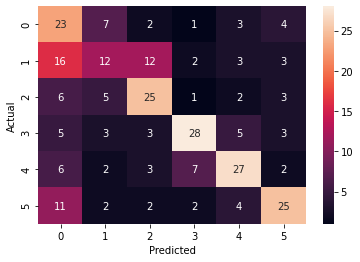

In [ ]:
import seaborn as sn
sn.heatmap(confusion_matrix(y_test,predictions), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

KNN

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=25, p=6,metric='euclidean')

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
y_pred

#Evaluate Model
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[294   0   0   0   0   0]
 [ 38   0   0   0   0   0]
 [ 44   0   0   0   0   0]
 [ 51   0   0   0   0   0]
 [ 43   0   0   0   0   0]
 [ 34   0   0   0   0   0]]


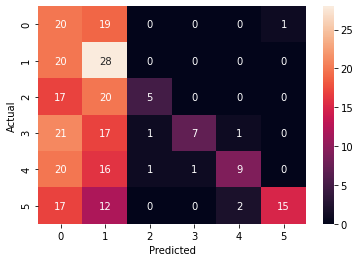

In [ ]:
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(f1_score(y_test, y_pred,average='micro'))
print(accuracy_score(y_test, y_pred))

0.5833333333333334
0.5833333333333334


Accuracy and loss

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras import models
from keras import layers
from keras.utils import np_utils

dataset = pd.read_csv('testdata.csv')

#print(dataset)

X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state=42)


def build_model():
    
     
    model =models.Sequential()

    model.add(LogisticRegression.layers[0]
    
    model.add(layers.Dense(64, input_dim=X_train.shape[1], activation='relu'))
    
    model.add(layers.Dense(64,activation='relu'))
    
    model.add(layers.Dense(1))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
model.fit(X_train, y_train, epochs=300, batch_size=10, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

In [ ]:
#Train the model
history = model.fit(
   X_train, y_train, 
   batch_size = 128, 
   epochs = 100, 
   verbose = 1, 
   validation_data = (X_test, y_test)
)

Epoch 1/100
11/11 [==============================] - 0s 11ms/step - loss: 2.5708 - accuracy: 0.8333 - val_loss: 2.5708 - val_accuracy: 0.8333
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 2.5708 - accuracy: 0.8333 - val_loss: 2.5708 - val_accuracy: 0.8333
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 2.5708 - accuracy: 0.8333 - val_loss: 2.5708 - val_accuracy: 0.8333
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 2.5708 - accuracy: 0.8333 - val_loss: 2.5708 - val_accuracy: 0.8333
Epoch 5/100
11/11 [==============================] - 0s 7ms/step - loss: 2.5708 - accuracy: 0.8333 - val_loss: 2.5708 - val_accuracy: 0.8333
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 2.5708 - accuracy: 0.8333 - val_loss: 2.5708 - val_accuracy: 0.8333
Epoch 7/100
11/11 [==============================] - 0s 7ms/step - loss: 2.5708 - accuracy: 0.8333 - val_loss: 2.5708 - val_accuracy: 0.8333
Epoch 8/100


In [ ]:
print(history.history.keys()) 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
